In [34]:
#!/Users/gui/.virtualenvs/gui3/bin/python

from lxml import html
import requests
import operator
import pandas as pd
import json
import datetime as dt


FRONTPAGE_URL = 'http://www.aftenposten.no'

page = requests.get(FRONTPAGE_URL)
tree = html.fromstring(page.content)

create_article_ids = tree.xpath("//*/@data-engage-entity-id")

','.join(create_article_ids)

'XkG3g,Mex0M,RAPOa,9Jgw5,A18Kx,dWgKA,aMrL5,A18Qq,O5RgA,kVqg9,qlK8O,jyVJA,p28bo,O5GR3,r604K,2OMPa,zBRzb,J90Oj,LbJmP,KxQ37,Me0aE,vBExB,2OQKr,Kxm15,L72xq,ogJ8m,2OLWB,XkPe7,6Gr3z,O5R11,44nlR,R7AGA,6Gx0Q,Xkv5g,1AgkJ,GEvx9,A1AEA,276eG,k9Aqv,O55XA,80BK1,LbvpR,wByK4,KxEje,1A2Ol,06w3g,enbAy,qlgVz,yBe7r,gmXL1,EP7gG,yBeEa,8de7r,O5RpV,Lbyn4,J9PJP,7kEbW,k94WX,gmXwa,k9qyk,EP0ba,dWLpJ,jyG9e,dewrB,GEzvm,57A1m,vBEOV,pR70j,vB05p,9Jjww,7kERW,pR8kX,2OanR,k941A,k94kk,8d32d,gmg35,qlzW0,b1ykA,GEz2x,A16zM,57AG1,de22w,O5LMO,9Jj1M,J9KX6,Q6QpJ,jy4W9,GEoWQ,XkrAb,1AEKB,b13M3,8d3mA,O5Lb3,7kadv,RAJ7a,2ORd4,anVg5,38WK0,zBq7O,gmgxL,J8VeR,445no,Kgaq4,zBK2b,BLAy0,Q6Q7V,8dexr,mbkk0,AyBGM'

In [54]:
CONTENT_API_URL = 'http://content-api.data-pre.schibsted.io:2107'

CONTENT_API_POST_URL = '{content_api_url}/items-storages/aftenposten/search'
CONTENT_API_BODY = {"query":
  {
    "predicates":{
        "itemIds":{
          "type":"terms",
          "field":"_id",
          "value": "CSV_ITEM_IDS"
        }
      },
      "expression":"itemIds"
  },
    "result": {
        "projection": ["published", "created", "last-modified"],
        "maxNumItems": 1000
      }
  }

SCORES_API_URL = 'http://scores-storage-api.data-pre.schibsted.io:2107/scores-storages/{score_storage}/groups/{user_id}/recommendations'

class score_storages:
    category = 'aftenposten-category-based-logged-in-user'
    popularity = 'aftenposten-pop-24h-user'
    als24h = 'aftenposten-alsonpop-24h-logged-in-user'
    als7d = 'aftenposten-alsonpop-7d-logged-in-user'
    
def articles_content(article_ids):
    content_search = CONTENT_API_BODY.copy()
    content_search['query']['predicates']['itemIds']['value'] = ','.join(create_article_ids)
    content_query = requests.post(CONTENT_API_POST_URL.format(content_api_url=CONTENT_API_URL), json=content_search, headers=CONTENT_API_HEADERS)
    content_query.raise_for_status()
    return content_query.json()


def articles_scores(article_ids, user_id='1766144', score_storage=score_storages.category):
    scores_query = requests.get(SCORES_API_URL.format(**locals()), headers=SCORES_API_HEADERS)
    scores_query.raise_for_status()
    return [id_score for id_score in scores_query.json()['recommendations'] if id_score['id'] in article_ids]


def get_article_fields(article, fields=CONTENT_API_BODY['result']['projection']):
    return (article['itemId'],) + operator.itemgetter(*fields)(article['fields'])


110/98/73 articles, ie 100.00/89.09/66.36 % on FP/ContentApi/aftenposten-category-based-logged-in-user (without content: ['Kxm15' '2OLWB' 'Xkv5g' 'LbvpR' '8de7r' 'k94WX' 'dWLpJ' 'pR70j' 'vB05p'
 'pR8kX' 'A16zM' 'de22w'])


,query_time,published,last-modified
1A2Ol,2017-02-13 17:53:40.586172,2017-02-03 20:30:00,2017-02-04 10:42:46
jyG9e,2017-02-13 17:53:40.586172,2017-02-03 10:27:11,2017-02-06 09:17:46
EP7gG,2017-02-13 17:53:40.586172,2017-02-06 10:11:45,2017-02-06 10:16:16
Kgaq4,2017-02-13 17:53:40.586172,2017-01-25 20:45:00,2017-02-06 12:29:03
dewrB,2017-02-13 17:53:40.586172,2017-02-01 09:04:59,2017-02-07 14:42:04
anVg5,2017-02-13 17:53:40.586172,2017-02-07 06:26:37,2017-02-07 15:17:27
kVqg9,2017-02-13 17:53:40.586172,2017-02-02 08:17:08,2017-02-08 08:28:05
1AEKB,2017-02-13 17:53:40.586172,2017-02-08 07:44:56,2017-02-08 09:05:17
mbkk0,2017-02-13 17:53:40.586172,2017-02-08 10:20:18,2017-02-08 14:01:34
AyBGM,2017-02-13 17:53:40.586172,2017-02-08 16:05:23,2017-02-08 16:05:23


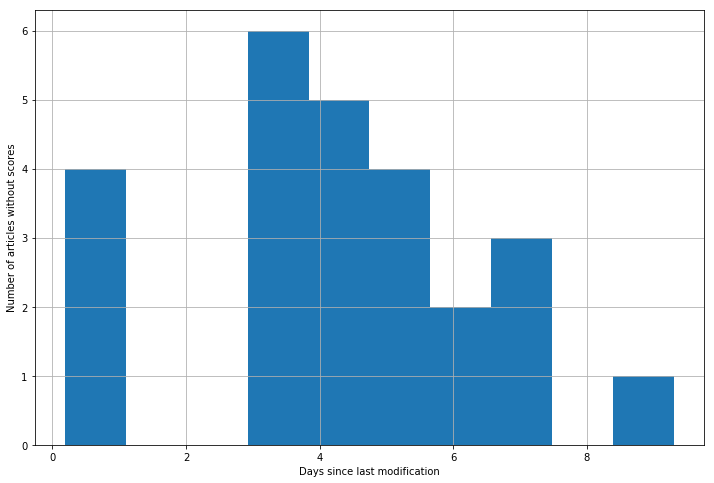

In [62]:
content_results = articles_content(create_article_ids)
indexed_articles = pd.DataFrame(data=list(map(get_article_fields, content_results['items'])),
                                  columns=['itemId'] + CONTENT_API_BODY['result']['projection'])

score_storage = score_storages.category
scored_articles = pd.DataFrame.from_records(articles_scores(create_article_ids, score_storage=score_storage))


front_page_articles = pd.DataFrame(index=create_article_ids)\
                        .join(indexed_articles.set_index('itemId'))\
                        .join(scored_articles.set_index('id'))



front_page_articles['published'] = pd.to_datetime(front_page_articles['published'])
front_page_articles['last-modified'] = pd.to_datetime(front_page_articles['last-modified'])
front_page_articles['created'] = pd.to_datetime(front_page_articles['created'])

query_time = dt.datetime.now()
front_page_articles['query_time'] = pd.to_datetime(query_time)

n_fp_articles = front_page_articles.shape[0]
n_indexed_articles = (~front_page_articles.published.isnull()).sum()
n_scored_articles = (~front_page_articles.score.isnull()).sum()

print('{}/{}/{} articles, ie {:.2f}/{:.2f}/{:.2f} % on FP/ContentApi/{} (without content: {})'.format(
    n_fp_articles,
    n_indexed_articles,
    n_scored_articles,
    100.0 * n_fp_articles / n_fp_articles,
    100.0 * n_indexed_articles / n_fp_articles,
    100.0 * n_scored_articles / n_fp_articles,
    score_storage,
    front_page_articles[front_page_articles.published.isnull()].index.values))


articles_wo_scores = front_page_articles.score.isnull() & ~front_page_articles.published.isnull()

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
front_page_articles[articles_wo_scores]\
    .assign(days_since_mod=lambda df: (df['query_time'] - df['last-modified']).dt.total_seconds() / (1440 * 60))\
    .days_since_mod\
    .hist()
    
plt.xlabel('Days since last modification'); plt.ylabel('Number of articles without scores')
            
front_page_articles[articles_wo_scores]\
    .sort_values(by='last-modified')[['query_time', 'published', 'last-modified']]


In [ ]:
#print('{}'.format(front_page_articles.max().to_csv()))

# front_page_articles.to_csv('~/Data/frontpage/{:%Y%m%d%H%M}_front_page_articles.csv'.format(query_time))

#from crontab import CronTab
#cron = CronTab(user=True)

#job = cron.new(command='/Users/Gui/Dev/ap-scraper/scrape_ap.py 1>> /Users/Gui/Data/frontpage/frontpage.log')
#job.minute.on(5)
#cron.write()